In [1]:
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib

In [2]:
LOCAL_DIR = os.path.join("data", "housing")
LOCAL_FILE = os.path.join(LOCAL_DIR,'housing.csv')

In [3]:
df = pd.read_csv(LOCAL_FILE)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df = df[df["ocean_proximity"] != 'ISLAND']

In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

In [7]:
#One Hot Encoding
df = pd.get_dummies(df)

In [8]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

### Three ways to Deal with Missing Values
#### 1. Drop the rows containing missing values
#### 2. Drop the whole column that has missing values
#### 3. For Numerical columns, Impute (estimate) the values with mean, median or some other statistic of the column

In [ ]:

#df.dropna(subset=["total_bedrooms"]) # option 1

#df.drop("total_bedrooms", axis=1) # option 2

#median = df["total_bedrooms"].median()
#df["total_bedrooms"].fillna(median) # option 3

In [9]:
imputer = Imputer(strategy="median")

In [10]:
imputed = imputer.fit_transform(df)

In [11]:
df = pd.DataFrame(imputed,columns=df.columns)

In [12]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                        0.0                     0.0   
1                        0.0                     0.0   
2                        0.0                     0.0   
3                        0.0                     0.0   
4                        0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 13 columns):
longitude                     20635 non-null float64
latitude                      20635 non-null float64
housing_median_age            20635 non-null float64
total_rooms                   20635 non-null float64
total_bedrooms                20635 non-null float64
population                    20635 non-null float64
households                    20635 non-null float64
median_income                 20635 non-null float64
median_house_value            20635 non-null float64
ocean_proximity_<1H OCEAN     20635 non-null float64
ocean_proximity_INLAND        20635 non-null float64
ocean_proximity_NEAR BAY      20635 non-null float64
ocean_proximity_NEAR OCEAN    20635 non-null float64
dtypes: float64(13)
memory usage: 2.0 MB


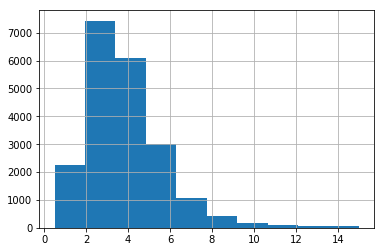

In [14]:
df['median_income'].hist()

In [15]:
buckets = np.linspace(0,16,6)
df['median_income_cats'] = pd.cut(df['median_income'], buckets)

In [17]:
df['median_income_cats'].value_counts()

(3.2, 6.4]      10231
(0.0, 3.2]       8655
(6.4, 9.6]       1407
(9.6, 12.8]       256
(12.8, 16.0]       86
Name: median_income_cats, dtype: int64

In [18]:
df['median_income_cats'].value_counts()/len(df)

(3.2, 6.4]      0.495808
(0.0, 3.2]      0.419433
(6.4, 9.6]      0.068185
(9.6, 12.8]     0.012406
(12.8, 16.0]    0.004168
Name: median_income_cats, dtype: float64

In [19]:
X_train,X_test = train_test_split(df,test_size=0.2,stratify= df['median_income_cats'],
                                  shuffle = True,random_state=100)

In [20]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]      0.495820
(0.0, 3.2]      0.419433
(6.4, 9.6]      0.068149
(9.6, 12.8]     0.012418
(12.8, 16.0]    0.004180
Name: median_income_cats, dtype: float64

In [21]:
X_test['median_income_cats'].value_counts()/len(X_test)

(3.2, 6.4]      0.495760
(0.0, 3.2]      0.419433
(6.4, 9.6]      0.068331
(9.6, 12.8]     0.012358
(12.8, 16.0]    0.004119
Name: median_income_cats, dtype: float64

In [22]:
X_train.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
15020    -117.01     32.77                24.0       2311.0           536.0   
1250     -122.05     39.34                44.0       1064.0           230.0   
1100     -121.75     39.88                16.0       2867.0           559.0   
3621     -118.45     34.24                11.0       9053.0          2193.0   
5830     -118.31     34.20                36.0       1692.0           263.0   

       population  households  median_income  median_house_value  \
15020      1005.0       525.0         2.9000            185200.0   
1250        494.0       175.0         2.8750             61500.0   
1100       1203.0       449.0         2.7143             95300.0   
3621       7096.0      2038.0         3.5082            136500.0   
5830        778.0       278.0         5.0865            349600.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
15020                        1.0                     0.0   
1250                         0.0                     1.0   
1100                         0.0                     1.0   
3621                         1.0                     0.0   
5830                         1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN median_income_cats  
15020                       0.0                         0.0         (0.0, 3.2]  
1250                        0.0                         0.0         (0.0, 3.2]  
1100                        0.0                         0.0         (0.0, 3.2]  
3621                        0.0                         0.0         (3.2, 6.4]  
5830                        0.0                         0.0         (3.2, 6.4]

In [23]:
X_train,X_valid = train_test_split(X_train,test_size=0.15,
                                  stratify= X_train['median_income_cats'],
                                  shuffle = True,random_state=100)

In [24]:
X_train['median_income_cats'].value_counts()/len(X_train)

(3.2, 6.4]      0.495831
(0.0, 3.2]      0.419428
(6.4, 9.6]      0.068135
(9.6, 12.8]     0.012401
(12.8, 16.0]    0.004205
Name: median_income_cats, dtype: float64

In [25]:
X_valid['median_income_cats'].value_counts()/len(X_valid)

(3.2, 6.4]      0.495761
(0.0, 3.2]      0.419459
(6.4, 9.6]      0.068228
(9.6, 12.8]     0.012515
(12.8, 16.0]    0.004037
Name: median_income_cats, dtype: float64

In [26]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 14), (2477, 14), (4127, 14))

In [27]:
y_train = X_train['median_house_value'].copy()
y_valid = X_valid['median_house_value'].copy()
y_test = X_test['median_house_value'].copy()

In [28]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [29]:
X_train.drop('median_house_value',axis=1,inplace=True)
X_valid.drop('median_house_value',axis=1,inplace=True)
X_test.drop('median_house_value',axis=1,inplace=True)

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 13), (2477, 13), (4127, 13))

In [31]:
X_train.drop('median_income_cats',axis=1,inplace=True)
X_valid.drop('median_income_cats',axis=1,inplace=True)
X_test.drop('median_income_cats',axis=1,inplace=True)

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
X_train.shape,X_valid.shape,X_test.shape

((14031, 12), (2477, 12), (4127, 12))

In [33]:
y_train.shape,y_valid.shape,y_test.shape

((14031,), (2477,), (4127,))

In [34]:
scalerMM = MinMaxScaler()
scalerMM.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [35]:
X_train_MM_scaled = scalerMM.transform(X_train)
X_valid_MM_scaled = scalerMM.transform(X_valid)
X_test_MM_scaled = scalerMM.transform(X_test)

In [36]:
scalerMM_for_y = MinMaxScaler()
scalerMM_for_y.fit(y_train.reshape(-1,1))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


MinMaxScaler(copy=True, feature_range=(0, 1))

In [37]:
y_train_MM_scaled = scalerMM_for_y.transform(y_train.reshape(-1,1))
y_valid_MM_scaled = scalerMM_for_y.transform(y_valid.reshape(-1,1))
y_test_MM_scaled = scalerMM_for_y.transform(y_test.reshape(-1,1))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
scalerStd = StandardScaler()
scalerStd.fit(X_train)

X_train_Std_scaled = scalerStd.transform(X_train)
X_valid_Std_scaled = scalerStd.transform(X_valid)
X_test_Std_scaled = scalerStd.transform(X_test)

scalerStd_for_y = StandardScaler()
scalerStd_for_y.fit(y_train.reshape(-1,1))

y_train_Std_scaled = scalerStd_for_y.transform(y_train.reshape(-1,1))
y_valid_Std_scaled = scalerStd_for_y.transform(y_valid.reshape(-1,1))
y_test_Std_scaled = scalerStd_for_y.transform(y_test.reshape(-1,1))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


In [39]:
y_train_MM_scaled[:5]

array([[0.09278518],
       [0.4595878 ],
       [0.29134107],
       [0.43587655],
       [0.71649395]])

In [40]:
y_train_Std_scaled[:5]

array([[-1.26829263],
       [ 0.27599141],
       [-0.43234798],
       [ 0.17616417],
       [ 1.35759789]])

In [41]:
lr = LinearRegression()


In [42]:
lr.fit(X_train_MM_scaled,y_train_MM_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
print("Training set score: {:.2f}".format(lr.score(X_train_MM_scaled, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(lr.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Training set score: 0.65
validation set score: 0.63


In [44]:
train_preds = lr.predict(X_train_MM_scaled)

In [45]:
valid_preds = lr.predict(X_valid_MM_scaled)

In [46]:
reg_mse_train = mean_squared_error(y_train_MM_scaled, train_preds)
reg_rmse_train = np.sqrt(reg_mse_train)
reg_rmse_train

0.14044340333879055

In [49]:
reg_mse_valid = mean_squared_error(y_valid_MM_scaled, valid_preds)
reg_rmse_valid = np.sqrt(reg_mse_valid)
reg_rmse_valid

0.14477498897669627

In [50]:
print("Training R2 score: {:.2f}".format(r2_score(y_train_MM_scaled,train_preds)))
print("validation R2 score: {:.2f}".format(r2_score(y_valid_MM_scaled,valid_preds)))

Training R2 score: 0.65
validation R2 score: 0.63


In [51]:
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train_MM_scaled)
X_valid_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_valid_MM_scaled)

In [52]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train_MM_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print("Training set score: {:.2f}".format(lr_poly.score(X_train_poly, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(lr_poly.score(X_valid_poly, y_valid_MM_scaled)))

Training set score: 0.72
validation set score: 0.69


In [54]:
forest_reg = RandomForestRegressor(n_jobs=4)
forest_reg.fit(X_train_MM_scaled,y_train_MM_scaled)

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [55]:
print("Training set score: {:.2f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

Training set score: 0.96
validation set score: 0.79


In [56]:
[estimator.tree_.max_depth for estimator in forest_reg.estimators_]
[9, 10, 9, 11, 9, 9, 11, 7, 13, 10]

[9, 10, 9, 11, 9, 9, 11, 7, 13, 10]

In [57]:
forest_reg = RandomForestRegressor(n_estimators=200,n_jobs=-1).fit(X_train_MM_scaled,y_train_MM_scaled)
print("Training set score: {:.2f}".format(forest_reg.score(X_train_MM_scaled, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(forest_reg.score(X_valid_MM_scaled, y_valid_MM_scaled)))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Training set score: 0.97
validation set score: 0.82


In [58]:
print("validation set score: {:.2f}".format(forest_reg.score(X_test_MM_scaled, y_test_MM_scaled)))

validation set score: 0.82


In [59]:
gb = GradientBoostingRegressor()
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [60]:
gb = GradientBoostingRegressor(learning_rate=1).fit(X_train_MM_scaled,y_train_MM_scaled)
print("Training set score: {:.2f}".format(gb.score(X_train_MM_scaled, y_train_MM_scaled)))
print("validation set score: {:.2f}".format(gb.score(X_valid_MM_scaled, y_valid_MM_scaled)))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.88
validation set score: 0.76


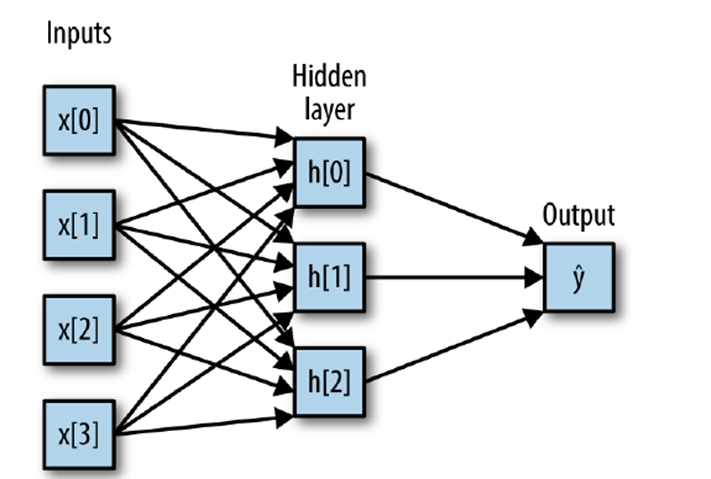

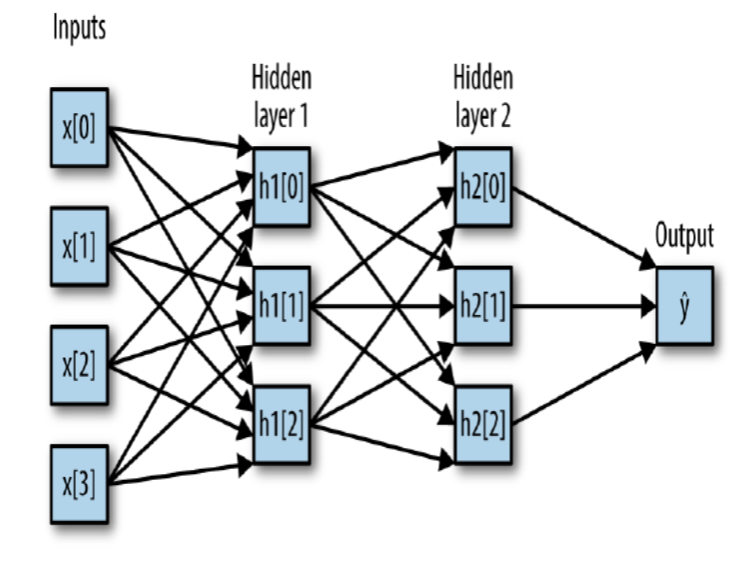

In [61]:
model = MLPRegressor()
model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [62]:
model = MLPRegressor(alpha=0.001,hidden_layer_sizes=(200,200,200,200,200)).fit(X_train_Std_scaled,y_train_Std_scaled)
preds_train = model.predict(X_train_Std_scaled)
preds_valid = model.predict(X_valid_Std_scaled)
print("Training R2 score: {:.2f}".format(r2_score(y_train_Std_scaled,preds_train)))
print("validation R2 score: {:.2f}".format(r2_score(y_valid_Std_scaled,preds_valid)))

C:\Users\MASTER\Anaconda3\envs\fastai\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training R2 score: 0.87
validation R2 score: 0.77


In [63]:
preds_test = model.predict(X_test_Std_scaled)
print("Test R2 score: {:.2f}".format(r2_score(y_test_Std_scaled,preds_test)))

Test R2 score: 0.79


In [64]:
joblib.dump(model, "nn_model.pkl")

['nn_model.pkl']

In [65]:
model = joblib.load("nn_model.pkl")